### logs Loader - AUC scores

The purpose of this notebook is to load the logs that contain the AUC scores that were produced from the convergence rate of Giorgos data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display, clear_output

# Pretty display for notebooks
%matplotlib inline

random_state = 0

rows_each = 60

zoom = 40 # number of samples for shorter plot

# specify the place from where we will use the data
source_path_features_rel = 'data/Main collection - results/logs/'

# specify the place from where we will use the data
saving_path = 'data/Main collection - results/images/'

# find the file names in the directory
feature_files = os.listdir(source_path_features_rel)

feature_files = [f for f in feature_files if f.startswith('convergence')] # narrow conv
feature_files_OCSVM = [f for f in feature_files if 'one-class SVM' in f]  # narrow SVM
feature_files_IF = [f for f in feature_files if 'Isolation Forest' in f]  # narrow IF

# remove the readme, and the Giorgos files
#feature_files.remove('README.md')
#feature_files.remove('best ratios by multiclass RF')

print("The number of files for OCSVM is {}. The first 3 are:\n{},\n{},\n{}.\n"
      .format(len(feature_files_OCSVM), *feature_files_OCSVM[:3]))

print("The number of files for IF is {}. The first 3 are:\n{},\n{},\n{}."
      .format(len(feature_files_IF), *feature_files_IF[:3]))

The number of files for OCSVM is 26. The first 3 are:
convergence experiment with Giorgos data on one-class SVM and 'all best ratios' features.csv,
convergence experiment with Giorgos data on one-class SVM and 'all euclidean ratios' features.csv,
convergence experiment with Giorgos data on one-class SVM and 'all features' features.csv.

The number of files for IF is 26. The first 3 are:
convergence experiment with Giorgos data on Isolation Forest and 'all best ratios' features.csv,
convergence experiment with Giorgos data on Isolation Forest and 'all euclidean ratios' features.csv,
convergence experiment with Giorgos data on Isolation Forest and 'all features' features.csv.


#### Select a feature group and pull the corresponding files

The possible files names will have one of those terms in the title that specifies the group of features they are made of:

    'positions', 'position intervals', 'speed intervals', 
    'x_pos_posInt_speed', 'y_pos_posInt_speed', 'z_pos_posInt_speed', 'magnitudes',
    'best_overall', 'all_overall',
    'euclidean distances', 'temporal distances', 'all_distances',
    'all euclidean ratios', 'all temporal ratios', 'all ratio features',
    'best euclidean ratios', 'best temporal ratios', 'all best ratios',
    'best overall distances', 'best overall ratios', 'best ratios distances', 
        'best overall dist ratios',
    'pos with distances', 'pos with best ratios', 'pos_distances_best_ratios',
    'all features'

In [22]:
selected_features = 'pos_distances_best_ratios'

selected_file_OCSVM = [f for f in feature_files_OCSVM if selected_features in f][0]
selected_file_IF = [f for f in feature_files_IF if selected_features in f][0]

# load the files
df_OCSVM = pd.read_csv(source_path_features_rel + selected_file_OCSVM)
df_IF = pd.read_csv(source_path_features_rel + selected_file_IF)

#### Plotting function

In the next cell we will specify the plotting function that we will use to create, show and save the AUC convergence rate plots for ocSVM and IF.

In [23]:
# style
plt.style.use('bmh')

def plotErrorToSampleCounts(x, y_svm, y_if, feature_set_name, clf_names,
                            saving_path=''):
    """ Plots the convergence rate of the AUC of 2 classifiers. """
    
    # init the figure and the axes object
    fig, ax = plt.subplots(1, 1)
    fig.set_tight_layout(False)

    # adjust the size of the figure
    fig.set_figwidth(6)
    fig.set_figheight(5)
        
    # plot df1 points
    ax.plot(x, y_svm, linewidth=1, color='maroon')#, linestyle='dashed'
    ax.plot(x, y_if, linewidth=1, color='darkblue')#, linestyle='dashed'
    
    # set text axes
    ax.set_title("Convergence rate on '{}' features"
                 .format(feature_set_name)) if not saving_path else None
    ax.set_xlabel('number of training samples')
    ax.set_ylabel('AUC score')
    # set limits in axis
    ax.set_xlim([1, len(x)])
    ax.set_ylim([0.3, 1])
    
    # set the legend
    ax.legend(clf_names, shadow=True)
    
    # save or show
    if saving_path:
        fig.savefig("{}/AUC convergence rate on '{}' features"
                    .format(saving_path, feature_set_name)+'.png',bbox_inches='tight') 
    else:
        plt.show()
        
    # close the image
    plt.close()

#### Plot the scores

Plots the AUC scores of the SVM and IF. We've been using the first 40 scores most often.

In [24]:
#df_OCSVM.loc[:39, 'AUC_score']
#df_IF.loc[:39, 'AUC_score']

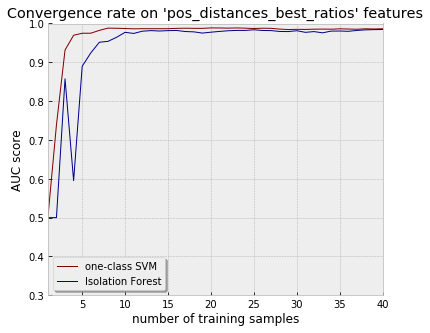

In [25]:
# show the plot
plotErrorToSampleCounts(list(range(1, 41)),                    # x
                        df_OCSVM.loc[:39, 'AUC_score'],        # y for SVM
                        df_IF.loc[:39, 'AUC_score'],           # y for IF
                        selected_features,                     # feature group name
                        ['one-class SVM', 'Isolation Forest']) # names for legend

In [26]:
# save the plot
plotErrorToSampleCounts(list(range(1, 41)),                    # x
                        df_OCSVM.loc[:39, 'AUC_score'],        # y for SVM
                        df_IF.loc[:39, 'AUC_score'],           # y for IF
                        selected_features,                     # feature group name
                        ['one-class SVM', 'Isolation Forest'], # names for legend
                        saving_path=saving_path)